# Multiprocessing:

The **multiprocessing library** is Python's standard library to support parallel computing using processes.

See documentation here:

https://docs.python.org/3/library/multiprocessing.html

In [1]:
import multiprocessing as mp

Let's first print out the total number of CPUs that on my machine that can be used for parallel computing.

In [2]:
print(f"Number of CPU cores: {mp.cpu_count()}")

Number of CPU cores: 14


Let's use an example to show you how to use multiple cores in one machine to reduce the time of execution time. 

### Example 1:

The script below generates $10^7$ random numbers between $0$ and $10$ and square the numbers

You can edit the file with ```vim``` into your workig directory, or download it from the repository:

https://github.com/wbandabarragan/computational-physics-2/blob/main/unit-3/random_square.py

```bash
vim random_square.py 
```

```Python
#!/opt/anaconda3/envs/py39/bin/python
"""
Script to generate 10 million random numbers.
"""
# Import modules
import numpy as np

# Random number function
def random_square(seed):
    """
    Square a random number generated witn an input seed.
    """
    # Allocate seed
    np.random.seed(seed)

    # Generate random number
    random_num = np.random.randint(0, 10)

    # Return squared values
    return random_num**2
```



#### A) Serial version:

We call the script in a ```for``` loop for range(100000):

In [5]:
# Import libraries
import numpy as np
import time

# Import our own module
import random_square

In [9]:
# Timing the code
start = time.time()

# Empty  list for results 
results = []

# Loop up to 10^7
for i in range(10000000): 
    results.append(random_square.random_square(i))

# Finish timing code
end = time.time()

# Serial execution time
t_serial = end - start

print(f'Serial execution time is {t_serial} s')

Serial execution time is 22.50039768218994 s


#### B) Parallel version

The simplest way to do parallel computing using the multiprocessing is to use the **Pool** class.

See documentation:

https://superfastpython.com/multiprocessing-pool-map/

https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool


There are 4 common methods in the class that we may use often, that is:

1. **apply**, 


2. **map**, 


3. **apply_async** and 


4. **map_async**.

Have a look of the documentation for the differences, and we will only use **map** function below to parallel the above example.

The **map(func, iterable)** function takes in two arguments, and apply the function **func** to each element in the **iterable**, and then collect the results. 

In [10]:
# Timing the code
start = time.time()

# Get number of laptop CPUs
n_cpu = mp.cpu_count()
print("The number of CPU cores is: ", n_cpu)

# Call Pool
pool = mp.Pool(processes=n_cpu)

# Call pool.map(func, iterable)
results = [pool.map(random_square.random_square, range(10000000))]

# Finish timing code
end = time.time()

# Serial execution time
t_parallel = end - start

print(f'Serial execution time is {t_parallel} s')

The number of CPU cores is:  14
Serial execution time is 3.081364154815674 s


### Code speedup:

In [14]:
# Speed up

print("Speedup factor: ", t_serial/t_parallel)
print("Expected speedup factor: ", n_cpu/1.)

Speedup factor:  7.30208977313683
Expected speedup factor:  14.0


#### Notes:

- We can see that using the above parallel version of the code, we reduce the run time from 22.50039768218994 s to 3.081364154815674 s. This is a big gain in speed, especially if we have a heavy computation, it will reduce a lot of time by running parallel computing. 

- The `pool.apply` function is similar except that it can accept more arguments. The `pool.map` and `pool.apply` will lock the main program until all the processes are finished, which is quite useful if we want to obtain results in a particular order for some applications.

- In contrast, if we do not need the results in a particular order, we can also use `pool.apply_async` or `pool.map_async`, which will submit all processes at once and retrieve the results as soon as they are finished. Check documentation to learn more. 

## Visualise the execution time for different number of CPU cores:

Let's visualise the execution time changes versus the number of data points using both the serial and parallel version.

We will see that until certain point, it is better to use the serial version. 

In [15]:
import matplotlib.pyplot as plt

In [16]:
# Serial function
def serial(n):
    """
    Function for serial execution.
    """
    # Time stamp
    start = time.time()
    results = []

    # Loop
    for i in range(n):
        results.append(random_square.random_square(i))

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

# Parallel function
def parallel(n, n_cpu):
    """
    Function for parallel execution.
    Inputs: n -> # instances
    Outputs: n_cpu -> # of cores
    """
    # Time stamp
    start = time.time()

    # Call multiprocessing Pool -> Create processes
    pool = mp.Pool(processes=n_cpu)

    # Allocate tasks into the pool
    results = [pool.map(random_square.random_square, range(n))]

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

## Runninng on all the CPU cores:

In [18]:
# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)

n_cpu = mp.cpu_count()
#print(n_run)

# Call functions for each n_run[i]
t_serial = np.array([serial(int(n)) for n in n_run])
t_parallel = np.array([parallel(int(n), n_cpu) for n in n_run])

# Check outputs
#print(t_serial)
#print(t_parallel)

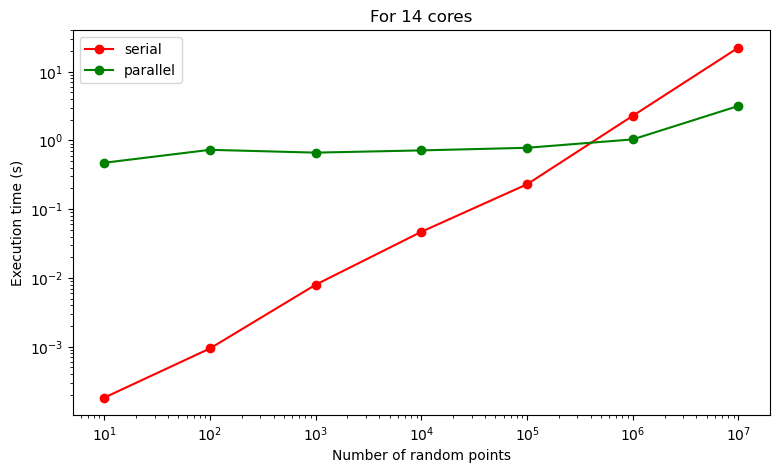

In [21]:
plt.figure(figsize = (9, 5))

plt.title(f"For {n_cpu} cores")
plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel, '-o', color = "green", label = 'parallel')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()

## Runninng on all the 4 cores:

In [22]:
# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)

n_cpu = 4 #mp.cpu_count()
#print(n_run)

# Call functions for each n_run[i]
t_serial = np.array([serial(int(n)) for n in n_run])
t_parallel = np.array([parallel(int(n), n_cpu) for n in n_run])

# Check outputs
#print(t_serial)
#print(t_parallel)

In [ ]:
plt.figure(figsize = (9, 5))

plt.title(f"For {n_cpu} cores")
plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel, '-o', color = "green", label = 'parallel')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()

### Conclusions:

- The above times and plots can very from PC to PC depending on the 

We can see from the figure that when the number of data points are small (below 10000), the execution time for the serial version is faster due to the overheads of the parallel version from launching and maintaining the new processes. But after that, we can see clearly the winner be the parallel version. 

# Using joblib


In Python, there are also other 3rd party packages that can make the parallel computing easier, especially for some daily tasks.

**joblib** is one of them, it provides an easy simple way to do parallel computing (it has many other usages as well). 


#### See documentation:

https://joblib.readthedocs.io/en/latest/index.html

First you need to install it by running 

```python
conda install joblib
```

Or:

```python
pip install joblib
```

Let's see how can we run the previous example using this new package. 

In [ ]:
from joblib import Parallel, delayed

import numpy as np
import time
import random_square

In [ ]:
# Time stamp at the beginning of the execution
start = time.time()

results = Parallel(n_jobs = 1)(delayed(random_square.random_square)(i) for i in range(1000000))

# Time stamp at the end of the execution
end = time.time()

# Print execution
print(end - start)

In [ ]:
# Time stamp at the beginning of the execution
start = time.time()

results = Parallel(n_jobs = 2)(delayed(random_square.random_square)\
          (i) for i in range(1000000))

# Time stamp at the end of the execution
end = time.time()

# Print execution
print(end - start)

In [ ]:
# Time stamp at the beginning of the execution
start = time.time()

results = Parallel(n_jobs = 4)(delayed(random_square.random_square)\
          (i) for i in range(1000000))

# Time stamp at the end of the execution
end = time.time()

# Print execution
print(end - start)

We can see the parallel part of the code becomes one line by using the joblib library, which is very convenient.


The **Parallel** is a helper class that essentially provides a convenient interface for the **multiprocessing** module we saw before. **Parallel:** creates the object responsible for managing the parallel execution. The Parallel object receives this sequence of "delayed" objects.

The **delayed** is used to capture the arguments of the target function, in this case, the **random_square**. We run the above code with 2 cores. **delayed:** acts as a function decorator, which transforms a function call into a "lazy object" deferring their execution until later. It avoids unnecessary computations until they are actually needed. The generator expression (delayed(random_square.random_square)(i) for i in range(1000000)) creates a sequence of these "delayed" objects.


### Notes on usage:

If you want to use all of the computational power on your machine. You can use all cores on your machine by setting *n\_jobs=-1*.


If you set it to -2, all CPUs but one are used. 


Besides, you can turn on the **verbose** argument to output the status messages. 

In [ ]:
results = Parallel(n_jobs=-1, verbose=1)(delayed(random_square.random_square)(i) for i in range(1000000))

### Backends

There are multiple backends in **joblib**, which means using different ways to do the parallel computing.

If you set the backend as **multiprocessing**, this is actually creating, under the hood, a multiprocessing pool that uses separate Python woker processes to execute tasks concurrently on separate cores. 

In [ ]:
results = Parallel(n_jobs=-1, backend='multiprocessing', verbose=1)\
          (delayed(random_square.random_square)(i) for i in range(1000000))

In [ ]:
import numpy as np
import time
from joblib import Parallel, delayed
import multiprocessing as mp

def matrix_multiplication_task(seed):
    """A task involving matrix multiplication."""
    np.random.seed(seed)
    matrix_size = 500  # Adjust for your system's capabilities
    matrix1 = np.random.rand(matrix_size, matrix_size)
    matrix2 = np.random.rand(matrix_size, matrix_size)
    result = np.matmul(matrix1, matrix2)
    return np.sum(result)  # Return a scalar to avoid large result transfer

def run_serial(n):
    start_time = time.time()
    results = [matrix_multiplication_task(i) for i in range(n)]
    end_time = time.time()
    return end_time - start_time

def run_joblib(n, n_jobs):
    start_time = time.time()
    results = Parallel(n_jobs=n_jobs)(delayed(matrix_multiplication_task)(i) for i in range(n))
    end_time = time.time()
    return end_time - start_time

def run_multiprocessing(n, n_processes):
    start_time = time.time()
    with mp.Pool(processes=n_processes) as pool:
        results = pool.map(matrix_multiplication_task, range(n))
    end_time = time.time()
    return end_time - start_time

In [ ]:
if __name__ == '__main__':
    
    # Test parameters
    n_tasks = 20
    n_jobs = 4  # Number of joblib jobs/multiprocessing processes
    
    # Run and time the functions
    serial_time = run_serial(n_tasks)
    joblib_time = run_joblib(n_tasks, n_jobs)
    multiprocessing_time = run_multiprocessing(n_tasks, n_jobs)
    
    # Print results
    print(f"Serial time: {serial_time:.4f} seconds")
    print(f"Joblib time: {joblib_time:.4f} seconds")
    print(f"Multiprocessing time: {multiprocessing_time:.4f} seconds")